# Assignment: Implementing Gradient Descent and Stochastic Gradient Descent

## Understanding Different Types of Gradient Descent
### Stochastic Gradient Descent (SGD)
Stochastic Gradient Descent updates the model parameters using only one randomly chosen data point per iteration. 

This makes it computationally efficient and allows it to escape local minima, but it can be noisy and less stable compared to other methods. 

The randomness in the updates introduces variance, which can sometimes help in finding a better solution, but may also slow down convergence or cause oscillations.

Mathematically, the update rule for SGD is:
$$ \theta^{(t+1)} = \theta^{(t)} - \alpha \nabla J_i(\theta) $$
where:
- $\theta$ represents the parameters
- $\alpha$ is the learning rate
- $\nabla J_i(\theta)$ is the gradient computed using a single data point $$ i $$


### Mini-Batch Gradient Descent
Mini-Batch Gradient Descent is a compromise between batch and stochastic gradient descent. Instead of using the entire dataset or a single data point, it updates the parameters using a small batch of randomly selected data points. This balances stability and efficiency, making it a commonly used approach in deep learning. Mini-batch gradient descent helps smooth out some of the noise of SGD while still being computationally efficient. The batch size is a hyperparameter that affects convergence speed and accuracy.

The update rule for mini-batch gradient descent is:
$$ \theta^{(t+1)} = \theta^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} \nabla J_i(\theta) $$
where:
- $m$ is the mini-batch size
- $\sum_{i=1}^{m} \nabla J_i(\theta)$ represents the gradient computed over a batch of $m$ data points

### Batch Gradient Descent (Vanilla)
Batch Gradient Descent computes the gradient using the entire dataset at each iteration. 

While this method leads to a smooth convergence, it is computationally expensive, especially for large datasets. 

It tends to be more stable and can find the optimal solution efficiently, but it may take longer compared to SGD and Mini-Batch Gradient Descent.

The update rule for batch gradient descent is:
$$ \theta^{(t+1)} = \theta^{(t)} - \alpha \nabla J(\theta) $$
where:
- $\nabla J(\theta)$ is the gradient computed over the entire dataset

## Task 1: Implement Gradient Descent for a Quadratic Function
1. Define a quadratic function, e.g., $$ f(x) = x^2 $$.
2. Implement a gradient descent to minimize this function.
3. Use different learning rates and visualize the convergence.
4. Plot the function and the gradient descent path.
5. Plot the evolution of loss across iterations

What should we do firtly
find a derivative - f(x) = x^2; 
derivative of - f(x) = 2x

2) realize gradient descent:
update x in every step
x new  = x old - a*f'(x)


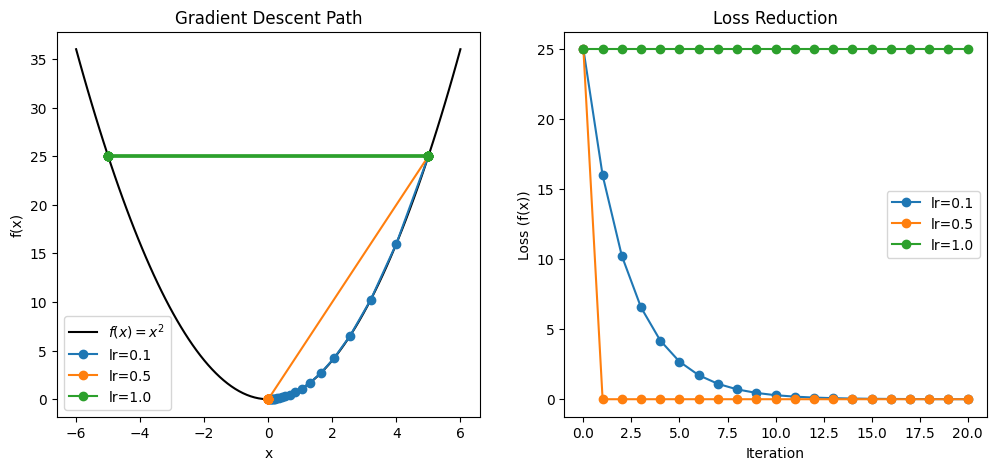

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2

def grad_f(x):
    return 2*x

def gradient_descent(start_x, learning_rate, num_iters):
    x = start_x
    history = [x]  #to remember x for plot
    loss_history = [f(x)]  #also

    for _ in range(num_iters):
        grad = grad_f(x)
        x = x - learning_rate * grad  
        history.append(x)
        loss_history.append(f(x))
    
    return np.array(history), np.array(loss_history)
###let use parameters
start_x =5
num_iters = 20
learning_rates = [0.1, 0.5, 1.0]

plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
x_vals = np.linspace(-6, 6, 100)
plt.plot(x_vals, f(x_vals), label=r'$f(x) = x^2$', color='black')
for lr in learning_rates:
    history, _ = gradient_descent(start_x, lr, num_iters)
    plt.plot(history, f(history), marker='o', label=f'lr={lr}')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent Path')
plt.legend()

#GRAPH OF LOSS REDUCTION
plt.subplot(1, 2, 2)
for lr in learning_rates:
    _, loss_history = gradient_descent(start_x, lr, num_iters)
    plt.plot(range(len(loss_history)), loss_history, marker='o', label=f'lr={lr}')

plt.xlabel('Iteration')
plt.ylabel('Loss (f(x))')
plt.title('Loss Reduction')
plt.legend()


## Task 2: Gradient Descent in Higher Dimensions
1. Define a function like $$ f(x, y) = x^2 + y^2 $$.
2. Implement gradient descent for two variables.
3. Visualize the contour plot and the optimization path.
4. Experiment with different initialization points and learning rates.

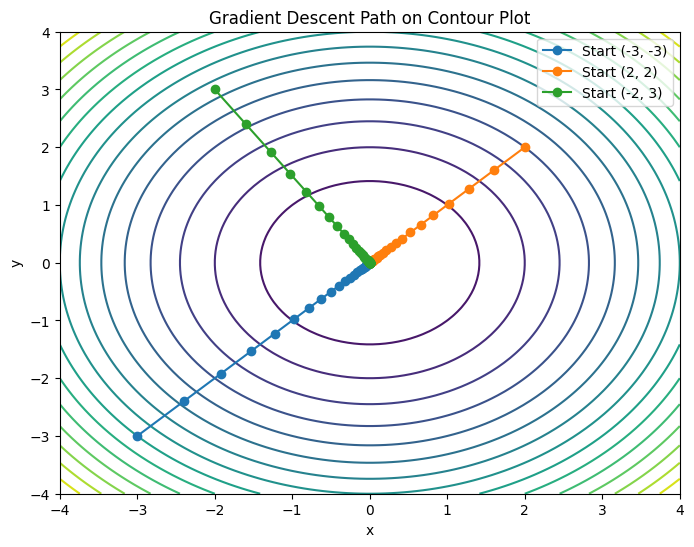

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return x**2 + y**2

def grad_f(x, y):
    return np.array([2*x, 2*y])  

def gradient_descent_2d(start_x, start_y, learning_rate, num_iters):
    x, y = start_x, start_y
    history = [(x, y)]  
    for _ in range(num_iters):
        grad = grad_f(x, y)  
        x -= learning_rate * grad[0]  
        y -= learning_rate * grad[1]  
        history.append((x, y))  
    
    return np.array(history)


start_points = [(-3, -3), (2, 2), (-2, 3)]  
learning_rate = 0.1
num_iters = 50

# GRIIIIID
x_vals = np.linspace(-4, 4, 100)
y_vals = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=20)  # contur

#start
for start_x, start_y in start_points:
    path = gradient_descent_2d(start_x, start_y, learning_rate, num_iters)
    plt.plot(path[:, 0], path[:, 1], marker='o', label=f"Start ({start_x}, {start_y})")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Gradient Descent Path on Contour Plot")
plt.legend()
plt.show()

## Task 3: Implement Stochastic Gradient Descent (SGD)
1. Generate a synthetic dataset : $$ y = 3x + 5 + \text{noise} $$.
2. Run gradient descent for linear regression.
3. Run stochastic gradient descent and compare results.
4. Plot the regression line and analyze the difference in convergence speed.

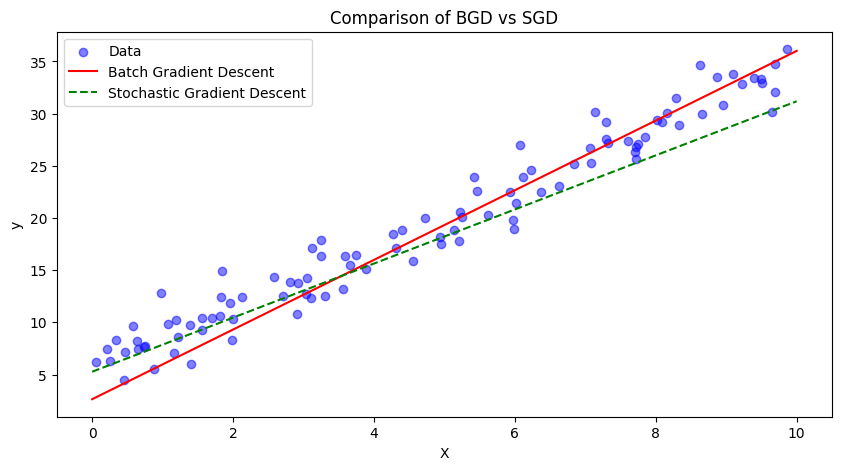

In [9]:
import numpy as np
import matplotlib.pyplot as plt

#generate data
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # X[0, 10]
y = 3 * X + 5 + np.random.randn(100, 1) * 2

#(Batch Gradient Descent)
def batch_gradient_descent(X, y, lr=0.01, epochs=100):
    m, b = 0, 0  # weights
    n = len(X)
    history = []  #write road

    for i in range(epochs):
        y_pred = m * X + b
        error = y_pred - y

        # Градиенты по m и b
        dm = (2/n) * np.sum(X * error)
        db = (2/n) * np.sum(error)

        # Обновление весов
        m -= lr * dm
        b -= lr * db

        history.append((m, b))
    
    return m, b, history

#SGD
def stochastic_gradient_descent(X, y, lr=0.01, epochs=100):
    m, b = 0, 0
    n = len(X)
    history = []

    for i in range(epochs):
        for i in range(n):
            rand_idx = np.random.randint(0, n)  #point
            xi, yi = X[rand_idx], y[rand_idx]
            y_pred = m * xi + b
            error = y_pred - yi

            # gradients by one
            dm = 2 * xi * error
            db = 2 * error

            m -= lr * dm
            b -= lr * db

            history.append((m, b))
    
    return m, b, history

#both alghorithms
m_bgd, b_bgd, history_bgd = batch_gradient_descent(X, y, lr=0.01, epochs=100)
m_sgd, b_sgd, history_sgd = stochastic_gradient_descent(X, y, lr=0.01, epochs=100)

plt.figure(figsize=(10, 5))

#initial
plt.scatter(X, y, color='blue', alpha=0.5, label="Data")
x_vals = np.linspace(0, 10, 100).reshape(-1, 1)

#bgd
plt.plot(x_vals, m_bgd * x_vals + b_bgd, color='red', label="Batch Gradient Descent")

#sgd
plt.plot(x_vals, m_sgd * x_vals + b_sgd, color='green', linestyle="--", label="Stochastic Gradient Descent")

plt.xlabel("X")
plt.ylabel("y")
plt.title("Comparison of BGD vs SGD")
plt.legend()
plt.show()


### Task 4
1. Define the multimodal function $$f(x, y) = (x^2 + y^2) * sin(x) * sin(y) + x^2 + y^2$$.
2. Visualize the 3D surface plot as well as the contour plot.
3. What could be a problem for convergence of the algorithm here ?
5. Run the gradient descent algorithm with different initial values and learning rates.
7. Add the optimization path to the contour plot for each initial value.
8. Compare the performance path of gradient descent and stochastic gradient descent for each initial value.



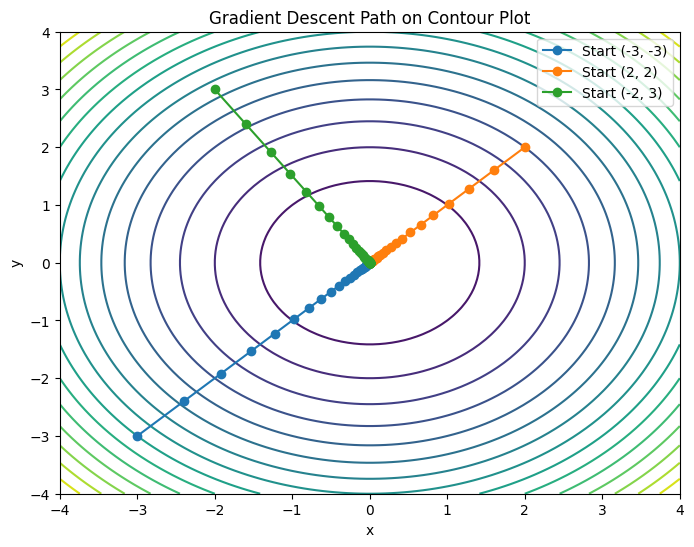

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return x**2 + y**2

def grad_f(x, y):
    return np.array([2*x, 2*y])  #(df/dx, df/dy)


def gradient_descent_2d(start_x, start_y, learning_rate, num_iters):
    x, y = start_x, start_y
    history = [(x, y)]  

    for _ in range(num_iters):
        grad = grad_f(x, y)  
        x -= learning_rate * grad[0]  
        y -= learning_rate * grad[1]  
        history.append((x, y)) 
    
    return np.array(history)


start_points = [(-3, -3), (2, 2), (-2, 3)]  
learning_rate = 0.1
num_iters = 50

#grid
x_vals = np.linspace(-4, 4, 100)
y_vals = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=20)  # contur graph

for start_x, start_y in start_points:
    path = gradient_descent_2d(start_x, start_y, learning_rate, num_iters)
    plt.plot(path[:, 0], path[:, 1], marker='o', label=f"Start ({start_x}, {start_y})")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Gradient Descent Path on Contour Plot")
plt.legend()
plt.show()


## SKlearn regressions library

- Take one dataset we already used for previous weeks. 
- Prepare data to train a model
- Fit a linear regression with OLS method
- Fit a linear regression with gradient descent (look at sklearn documentation to do so)
- Compare and explain the results

OLS Linear Regression Results:
  - MSE: 23399.4834
  - R² Score: 0.2610

 Gradient Descent Linear Regression Results:
  - MSE: 23400.0094
  - R² Score: 0.2610


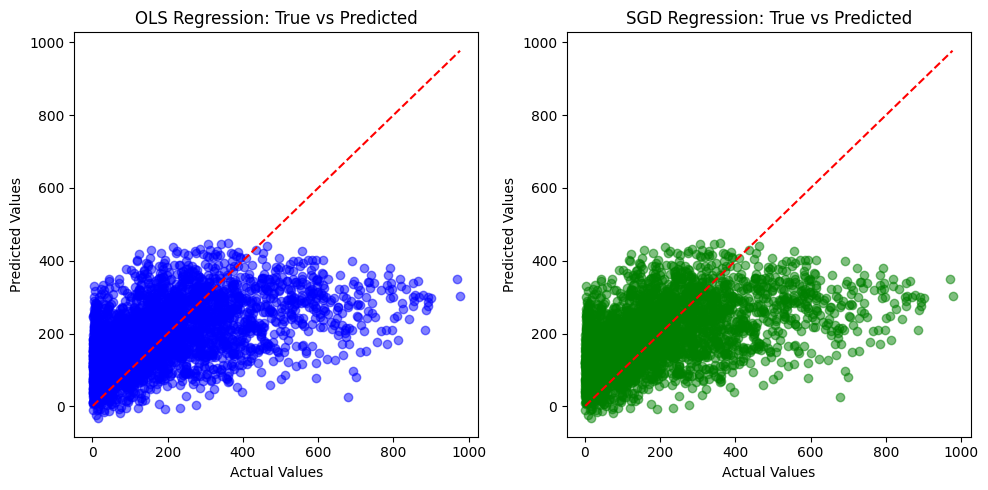

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

file_path = r"C:\Users\User\Desktop\ML\Second week\Bike.csv"
df = pd.read_csv(file_path)
# print(df.head())
features = ["temp", "atemp", "hum", "windspeed", "weekday", "workingday", "weathersit"]
target = "cnt"
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ols_model = LinearRegression()
ols_model.fit(X_train_scaled, y_train)
y_pred_ols = ols_model.predict(X_test_scaled)
mse_ols = mean_squared_error(y_test, y_pred_ols)
r2_ols = r2_score(y_test, y_pred_ols)

print("OLS Linear Regression Results:")
print(f"  - MSE: {mse_ols:.4f}")
print(f"  - R² Score: {r2_ols:.4f}")
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3, learning_rate="adaptive", eta0=0.01, random_state=42)
sgd_model.fit(X_train_scaled, y_train)
y_pred_sgd = sgd_model.predict(X_test_scaled)
mse_sgd = mean_squared_error(y_test, y_pred_sgd)
r2_sgd = r2_score(y_test, y_pred_sgd)

print("\n Gradient Descent Linear Regression Results:")
print(f"  - MSE: {mse_sgd:.4f}")
print(f"  - R² Score: {r2_sgd:.4f}")
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_ols, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle="--")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("OLS Regression: True vs Predicted")

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_sgd, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle="--")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("SGD Regression: True vs Predicted")

plt.tight_layout()
plt.show()
